In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import nibabel as nib
from ipywidgets import interact, IntSlider

In [2]:
data_full_path = '/home/thiago/IDOR/SPR_HeadCT_Age_Prediction_Challenge/spr_challange/data/samples_full/dataset_full_denoised'

In [53]:
filenames = os.listdir(data_full_path)

#pick a random image
filename = filenames[random.randint(0, len(filenames))]

In [54]:
print(filename)
data = nib.load(os.path.join(data_full_path, filename)).get_fdata()
print(data.shape)

data = data[:, :, int(0.3*data.shape[2]):]
print(data.shape)

000189full.nii.gz
(512, 512, 189)
(512, 512, 133)


In [38]:
# dcm_min, dcm_max = -15, 1024
dcm_min, dcm_max = -1024, 1024
# dcm_min, dcm_max = -200, 200
data[np.where(data<dcm_min)] = dcm_min
# data[np.where(data>150)] = 150
data = ((data - dcm_min) / (dcm_max - dcm_min))   # min-max normalization (0,1) 

In [25]:
data2 = [cv2.Laplacian(data[:, :, i], cv2.CV_64F)  for i in range(data.shape[2])]
data2 = np.array(data2).transpose(1, 2, 0)
print(data2.shape)

(512, 512, 235)


In [46]:
# Function to plot image for a given slice number
def plot_slice(slice_num):
    plt.imshow(data[:, :, slice_num], cmap='gray')
    plt.axis('off')
    plt.title(f"Slice {slice_num}")
    plt.show()

In [55]:
# Get the number of slices
num_slices = data.shape[2]
print(num_slices)

# Create slider
slice_slider = IntSlider(min=0, max=num_slices - 1, value=0, description='Slice')

133


In [56]:
# Create interactive plot
fig = plt.figure(figsize=(15, 15))
interact(plot_slice, slice_num=slice_slider)

<Figure size 1500x1500 with 0 Axes>

interactive(children=(IntSlider(value=0, description='Slice', max=132), Output()), _dom_classes=('widget-inter…

<function __main__.plot_slice(slice_num)>

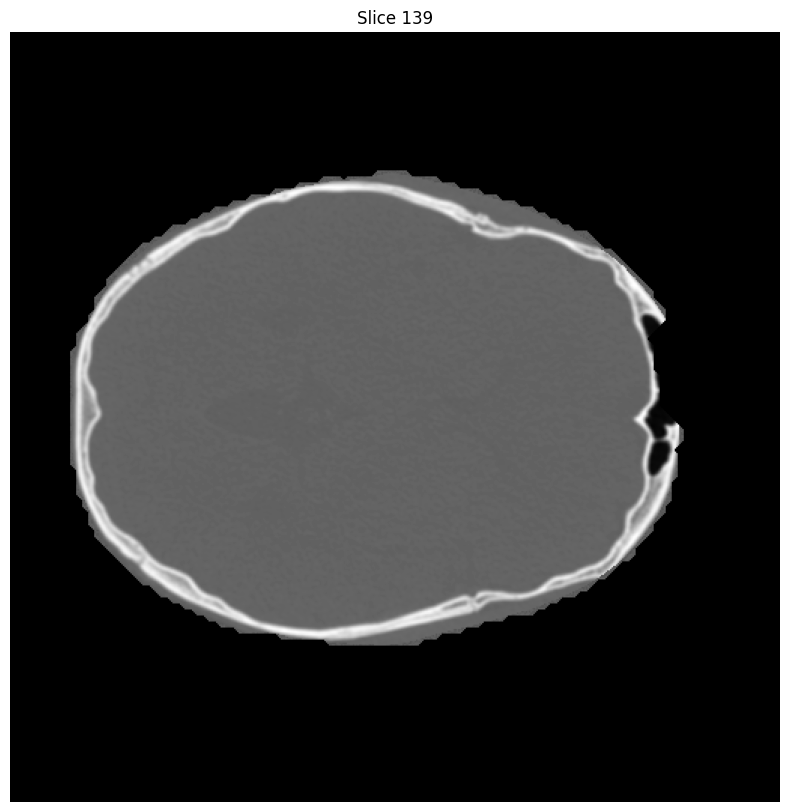

In [39]:
fig = plt.figure(figsize=(10, 10))
slice_num = 139
plt.imshow(data[:, :, slice_num], cmap='gray')
plt.axis('off')
plt.title(f"Slice {slice_num}")
plt.show()